In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('sample30.csv')
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [4]:
df.shape

(30000, 15)

In [5]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

## Data Sourcing And Sentiment Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [7]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [8]:
# % of null value in columns
print((df.isna().sum()/df.shape[0] * 100).round(2))

id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_text             0.00
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
dtype: float64


In [9]:
# We can drop the columns reviews_userCity and reviews_userProvince as they have high % null values
df.drop(columns=['reviews_userProvince', 'reviews_userCity'], axis=1, inplace=True)

In [10]:
# Also since reviews_username, is a unique identification, we can drop the rows with null values
df = df[df['reviews_username'].notna()]

In [11]:
# Also since reviews_title, is an important column for sentiment based analysis, we drop null values
df = df[df['reviews_title'].notna()]

In [12]:
# Replacing the empty reviews_didPurchase columns with Null
df['reviews_didPurchase'].fillna('Null', inplace=True)

In [13]:
# For sentiment Analysis, we need user_sentiment column
df = df[df['user_sentiment'].notna()]

In [14]:
# Our prediction is based on reviews text and ratings, as they do not have any columns that are null,
# We can safely continue

In [15]:
# Next lets combine the user and id for checking duplicates.
df['unique_user'] = df['id']+df['reviews_username']
df['unique_user'].value_counts()

AVpfPPkEilAPnD_xX3cPbyamazon customer    22
AVpf9pzn1cnluZ0-uNTMbyamazon customer    19
AVpfPaoqLJeJML435Xk9mike                 15
AVpfPaoqLJeJML435Xk9chris                 9
AVpfPaoqLJeJML435Xk9movielover            7
                                         ..
AVpfM_ytilAPnD_xXIJbrosey                 1
AVpfPaoqLJeJML435Xk9snaktime              1
AVpf3VOfilAPnD_xjpunladybugpam            1
AVpe9W4D1cnluZ0-avf0etudiant              1
AVpf2tw1ilAPnD_xjflCschmind               1
Name: unique_user, Length: 27403, dtype: int64

In [16]:
# Now we will drop duplicates of same user and id combinations
df.drop_duplicates(subset='unique_user',keep='first',inplace=True)
df.drop(['unique_user'],axis=1,inplace=True)

In [17]:
print((df.isna().sum()/df.shape[0] * 100).round(2))

id                     0.00
brand                  0.00
categories             0.00
manufacturer           0.51
name                   0.00
reviews_date           0.15
reviews_didPurchase    0.00
reviews_doRecommend    6.71
reviews_rating         0.00
reviews_text           0.00
reviews_title          0.00
reviews_username       0.00
user_sentiment         0.00
dtype: float64


In [18]:
# # Find duplicate rows and keep only one row out of them.
# df = df.drop_duplicates(subset=['id','brand','categories','manufacturer','name','reviews_date','reviews_rating','reviews_text', 'reviews_title'],keep='last')
df.shape

(27403, 13)

In [19]:
df['reviews_doRecommend'].value_counts().index[0]

True

In [20]:
df['reviews_rating'].unique()

array([5, 1, 3, 4, 2])

In [21]:
df['reviews_title'].unique()[:5]

array(['Just Awesome', 'Good', 'Disappointed', 'Irritation',
       'Not worth it'], dtype=object)

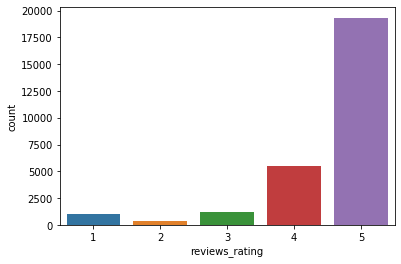

In [22]:
# Checking the distribution of rating

sns.countplot(df['reviews_rating'])
plt.show()

Observation:

We can observe that the count for 5 rating is very high.
Thus we can conclude we have high percentage of satisfied customers

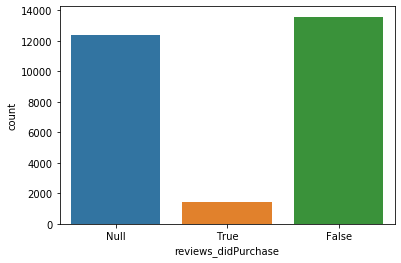

In [23]:
# Number of actual reviewers who bought product

sns.countplot(df['reviews_didPurchase'])
plt.show()

In [24]:
print('---Missing Reviews')
print(df['reviews_didPurchase'].isnull().sum())
print()
print('--Actual Reviewers')
print(df['reviews_didPurchase'].value_counts())

---Missing Reviews
0

--Actual Reviewers
False    13574
Null     12406
True      1423
Name: reviews_didPurchase, dtype: int64


In [25]:
# So the actual reviewers are only 1434
print('% of actual reviewers: ', (1434/30000)*100)

% of actual reviewers:  4.78


In [26]:
# Most popular products purchased
pdt_df = df[df['reviews_didPurchase'] == True]
pdt_df['name'].value_counts()[:3]

Hormel Chili, No Beans                                  91
Coty Airspun Face Powder, Translucent Extra Coverage    84
Chester's Cheese Flavored Puffcorn Snacks               76
Name: name, dtype: int64

In [27]:
# Understanding the brand and ratings

# top 5 brands with max reviews
print(df['brand'].value_counts().sort_values(ascending=False)[:5])

Clorox               9679
Warner Home Video    3147
Disney               1150
Burt's Bees           881
FOX                   844
Name: brand, dtype: int64


In [28]:
# Aggregating brands to check their avg ratings and top brands based on ratings given
print(df.groupby('brand')['reviews_rating'].agg(['mean','count']).sort_values(by='count',ascending=False)[:5])

                       mean  count
brand                             
Clorox             4.824155   9679
Warner Home Video  4.334604   3147
Disney             4.681739   1150
Burt's Bees        4.650397    881
FOX                4.325829    844


In [29]:
# Categories that are divided totally

print(len(df['categories'].unique()))

252


In [30]:
df['categories'].value_counts().sort_values(ascending=False)[:3]

# one category has multiple labels, thus we can conclude a product can be attached to multiple labels

Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    7785
Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys                                                                                                                                                                                                                                                                                                                                                                                                   3147
Household Chemicals,Household Cleaners,Bath & 

In [31]:
# Analysis of users
df['reviews_username'].value_counts().sort_values(ascending=False)[:5]

# this provides top 5 users with max reviews

mike     17
chris    12
sandy    12
rick     12
jojo     11
Name: reviews_username, dtype: int64

In [32]:
# Analysis of manufacturer

df['manufacturer'].value_counts().sort_values(ascending=False)[:5]

# top 5 manufacturer with max reviews

Clorox            7786
Test              3147
AmazonUs/CLOO7    1893
Walt Disney       1094
Burt's Bees        873
Name: manufacturer, dtype: int64

In [33]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [34]:
# converting date columns for processing
df['reviews_date'] = pd.to_datetime(df['reviews_date'], errors='coerce')

In [35]:
# Descriptive Stats

print('Total Reviews: ', len(df['reviews_rating']))
print('Unique reviews: ', len(df['reviews_username'].unique()))
print('Total Manufacturers: ', len(df['manufacturer'].unique()))
print('Total Products: ', len(df['name'].unique()))
print('Overall Average rating: ', df['reviews_rating'].mean())
print('Reviews count ')
print(df['reviews_rating'].value_counts())

Total Reviews:  27403
Unique reviews:  24787
Total Manufacturers:  214
Total Products:  252
Overall Average rating:  4.519614640732766
Reviews count 
5    19321
4     5460
3     1209
1     1047
2      366
Name: reviews_rating, dtype: int64


In [36]:
df['reviews_text'] = df['reviews_text'].astype(str)
df['reviews_title'] = df['reviews_title'].astype(str)

In [37]:
# complete eda checkpoint for reference
df_eda = df.copy()

In [38]:
df.shape

(27403, 13)

In [39]:
# Saving the data
import pickle

df_eda.to_pickle('./data/final_eda', compression='zip')